# 01. Importing libraries

In [1]:
conda install seaborn matplotlib scipy

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# 02. Importing data

In [3]:
#Define path
path = r'C:\Users\Josh Abrams\Desktop\09-2022 Instacart Basket Analysis'

In [4]:
df_ords_prods_merge= pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_merged_user_flags.pkl'))


In [5]:
df_ords_prods_merge= pd.read_pickle(r'C:\Users\Josh Abrams\Desktop\09-2022 Instacart Basket Analysis\Data\Prepared Data\orders_products_merged_user_flags.pkl')

## 03. Creating a Bar Chart

<AxesSubplot:>

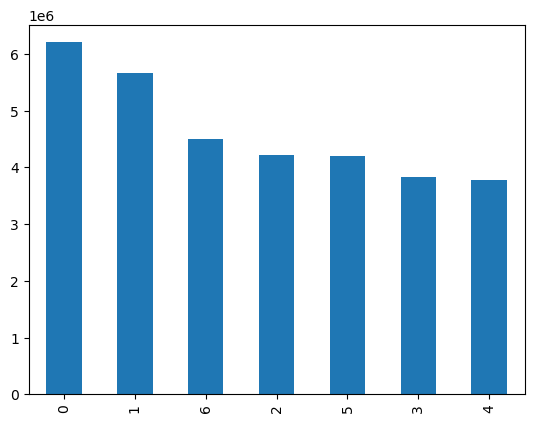

In [6]:
## Create a bar chart sorted A-Z
df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

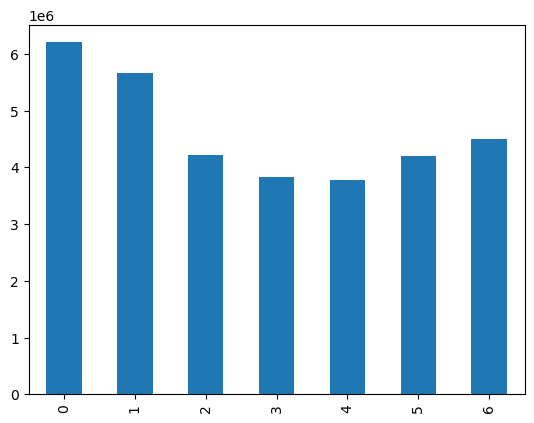

In [7]:
# sort by index
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [8]:
# sorted by frequency
df_ords_prods_merge['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [9]:
# reating an index in order
df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

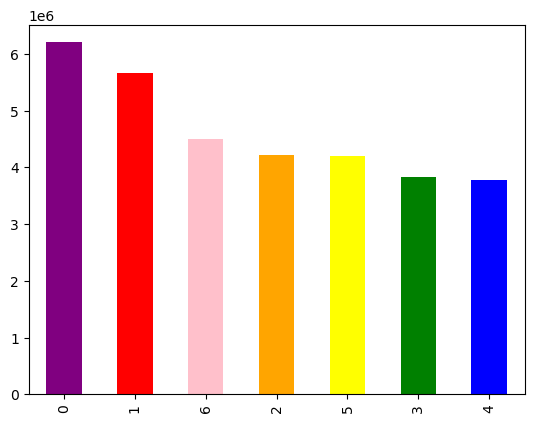

In [10]:
# Adding Color
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [11]:
# Exporting Figure
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow.png'))


## 04. Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

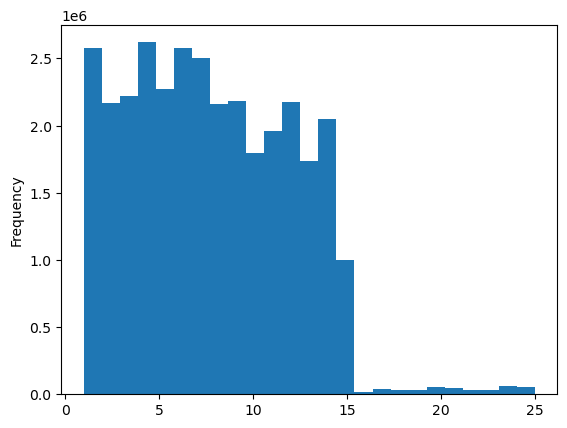

In [12]:
df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [13]:
df_ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [14]:
df_ords_prods_merge['prices'].mean()

7.790994092171152

In [15]:
df_ords_prods_merge['prices'].median()

7.4

In [16]:
df_ords_prods_merge['prices'].max()

25.0

## Scatterplots 

<AxesSubplot:xlabel='prices', ylabel='prices'>

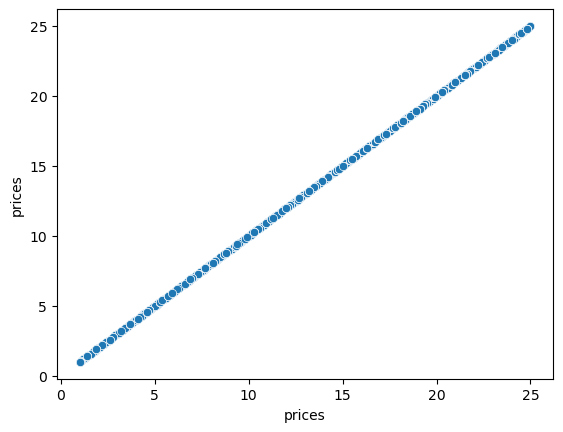

In [17]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [18]:
## CLEANING DATA
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,Unnamed: 0_x,order_id,customer_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_previous_order,Frequency_flag


In [19]:
## CLEANING DATA
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan


In [20]:
## CLEANING DATA CHECK
df_ords_prods_merge['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

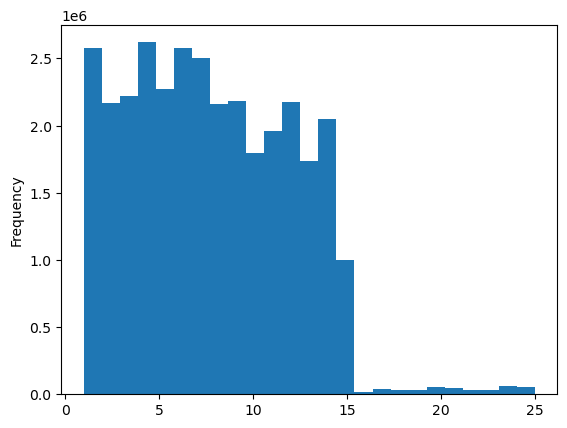

In [21]:
df_ords_prods_merge['prices'].plot.hist(bins = 25)

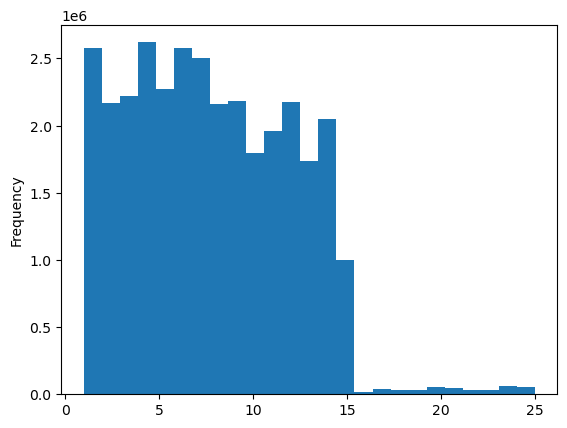

In [22]:
hist = df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [23]:
# Exporting Figure
hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_price.png'))

## 05. Creating Line Charts

In [24]:
df_line_chart = df_ords_prods_merge[:2000000]

## Sampling Data



In [25]:
# Create a list holding True/False values to the test np.random.rand() <- 0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [26]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [27]:
# Store 70% of the sample in the datafram big
big = df_ords_prods_merge[dev]


In [28]:
# Store 30% of the sample in the datafram big
small = df_ords_prods_merge[~dev]

In [29]:
len(df_ords_prods_merge)

32404859

In [30]:
len(big) + len(small)

32404859

In [31]:
df_2 = small[['orders_day_of_week','prices']]

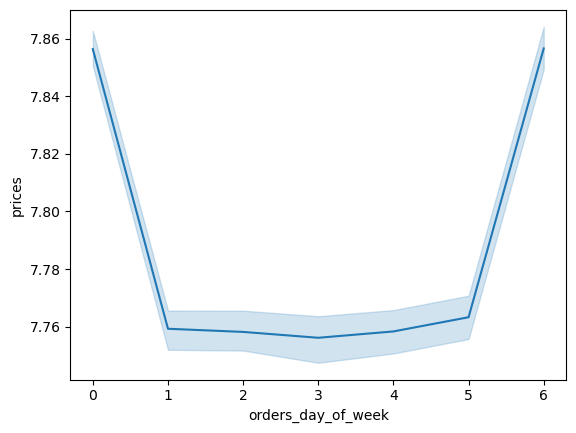

In [32]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')